<a href="https://colab.research.google.com/github/sreehariar04/test_new/blob/main/Case_Study_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***LIBRARIES***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage,dendrogram

from sklearn.metrics import silhouette_score


# ***Data Pre-Processing***

In [ ]:
adult_data = pd.read_csv('/content/adult_dataset.csv')
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [ ]:
adult_data.info()
adult_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38083 entries, 0 to 38082
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             36147 non-null  float64
 1   workclass       35861 non-null  object 
 2   fnlwgt          38083 non-null  int64  
 3   education       38083 non-null  object 
 4   education-num   38083 non-null  int64  
 5   marital-status  38083 non-null  object 
 6   occupation      35853 non-null  object 
 7   relationship    38083 non-null  object 
 8   race            38083 non-null  object 
 9   sex             38083 non-null  object 
 10  capital-gain    38083 non-null  int64  
 11  capital-loss    38083 non-null  int64  
 12  hours-per-week  36168 non-null  float64
 13  native-country  36074 non-null  object 
 14  income          38082 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 4.4+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,36147.000000,3.808300e+04,38083.000000,38083.000000,38083.000000,36168.000000
mean,38.620024,1.893411e+05,10.076885,1087.807316,87.782475,40.434970
std,13.894190,1.050453e+05,2.576251,7469.997810,404.025073,12.576621
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176000e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782440e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.368305e+05,12.000000,0.000000,0.000000,45.000000
max,255.000000,1.484705e+06,16.000000,99999.000000,4356.000000,225.000000


## ***Check for duplicates***

In [ ]:
adult_data.duplicated().sum()

np.int64(12)

In [ ]:
adult_data.T.duplicated().sum()

np.int64(0)

### ***Handling Duplicates***

In [ ]:
adult_data.drop_duplicates(inplace=True)

## ***Check for Null Values***

In [ ]:
adult_data.isna().sum()

,0
age,1936
workclass,2222
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,2230
relationship,0
race,0
sex,0


In [ ]:
adult_data.replace('?', np.nan, inplace=True)

In [ ]:
# adult_data.head()

In [ ]:
adult_data.shape

(38071, 13)

## ***Seperating Numerical and Categorical Columns***

In [ ]:
num_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
num_cols


['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [ ]:
cat_cols = ['workclass','occupation','marital-status','relationship',
            'race','sex','native-country']

In [ ]:
# Mode for categorical columns
for col in cat_cols:
    adult_data[col] = adult_data[col].fillna(adult_data[col].mode()[0])

# Median for numerical columns
adult_data[num_cols] = adult_data[num_cols].fillna(adult_data[num_cols].median())


In [ ]:
adult_data.isna().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [ ]:
adult_data.isna().sum()


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## ***Outlier Detection***

<Axes: >

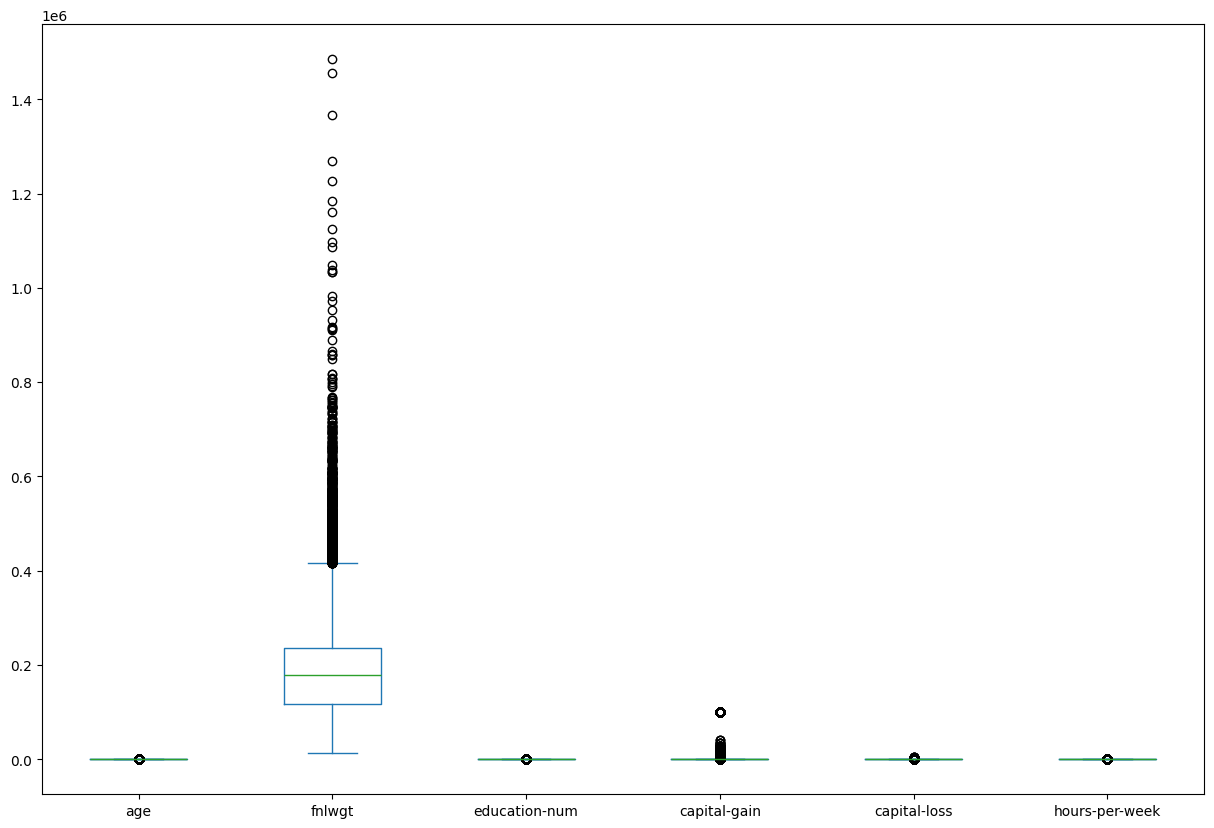

In [ ]:
adult_data.plot(kind='box',layout=(2,4), figsize=(15,10))

## ***Outlier Removal***

In [ ]:
for col in num_cols:
    Q1 = adult_data[col].quantile(0.25)
    Q3 = adult_data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    adult_data[col] = np.clip(adult_data[col], lower_bound, upper_bound)



<Axes: >

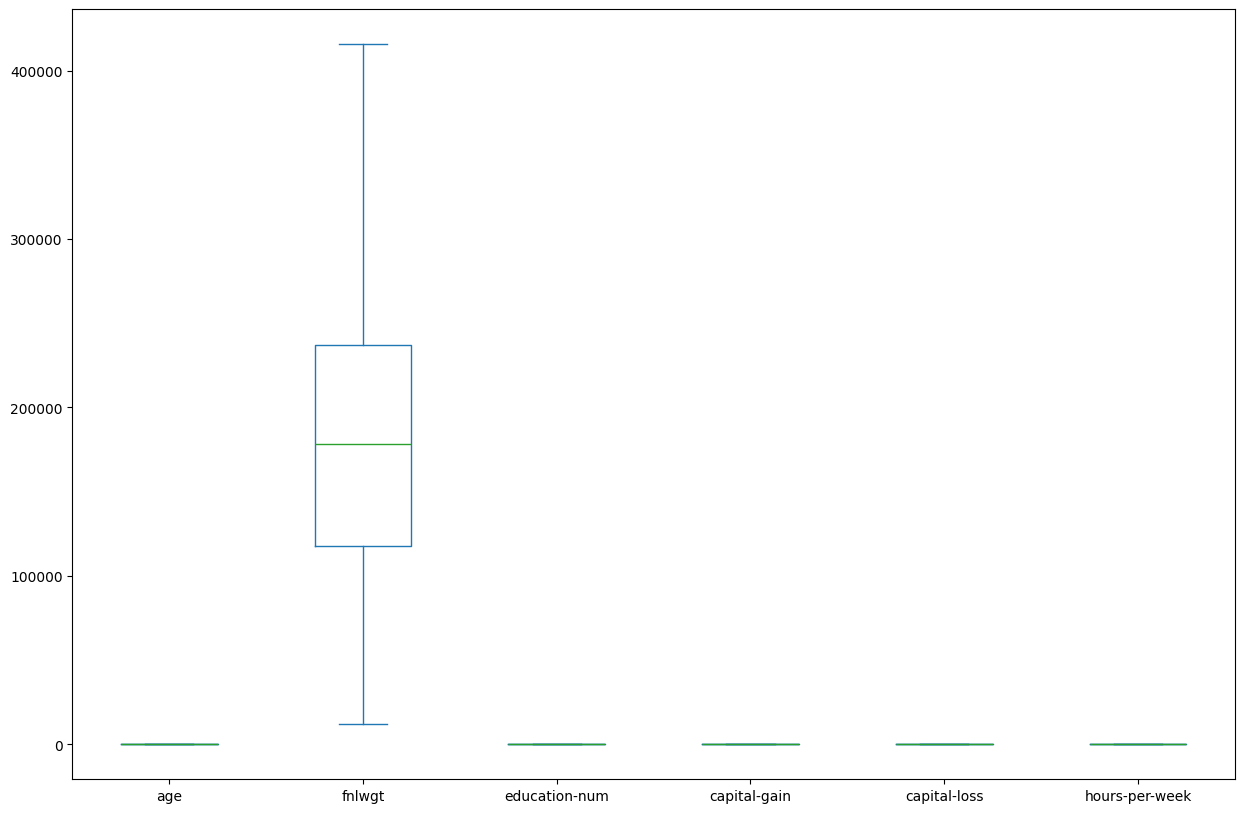

In [ ]:
adult_data.plot(kind='box',layout=(2,4), figsize=(15,10))

# ***Feature Distributions***

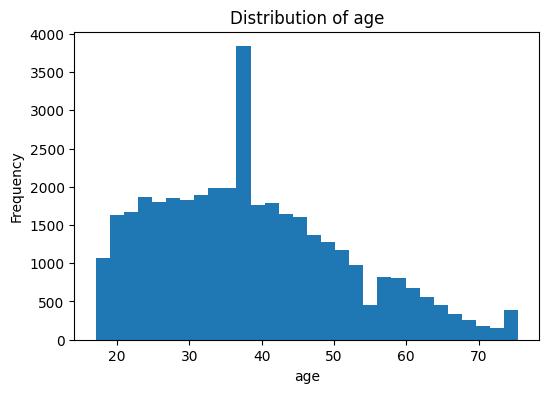

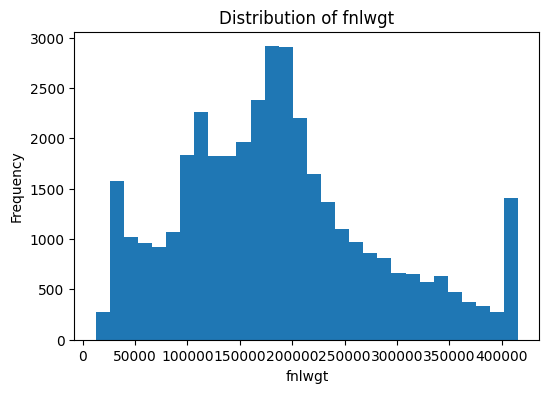

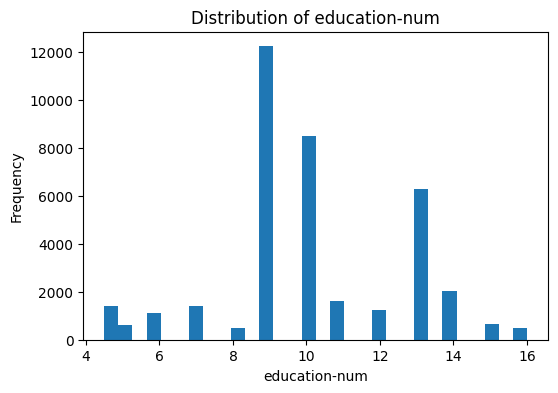

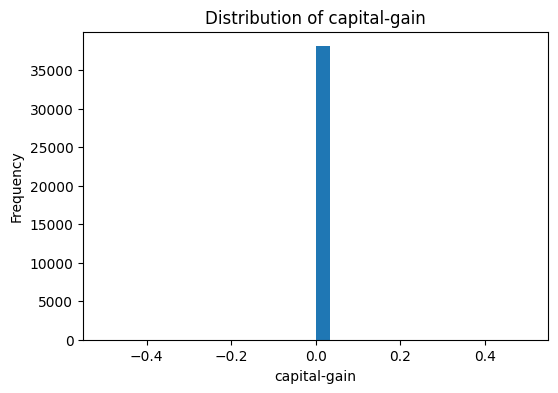

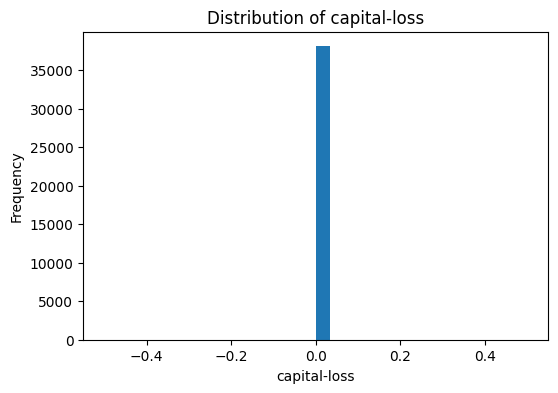

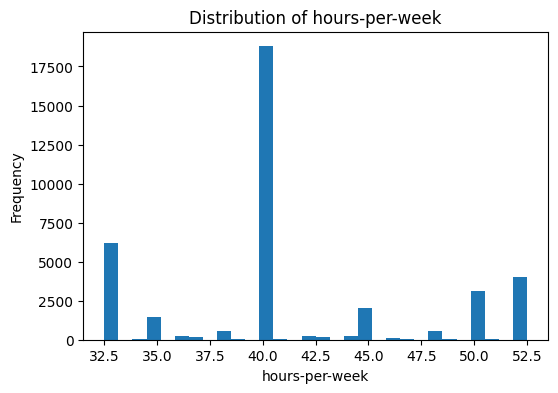

In [ ]:
#NUmerical columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    plt.hist(adult_data[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

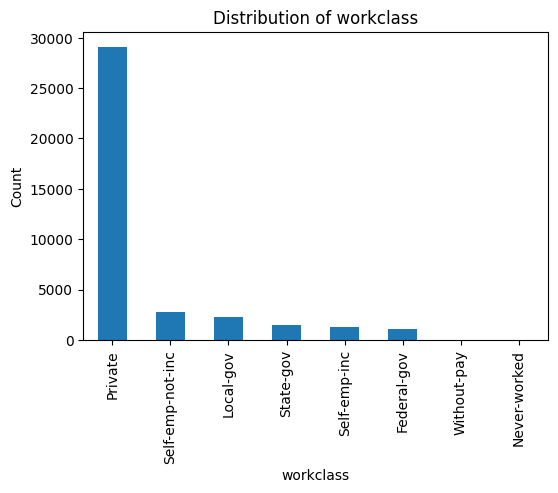

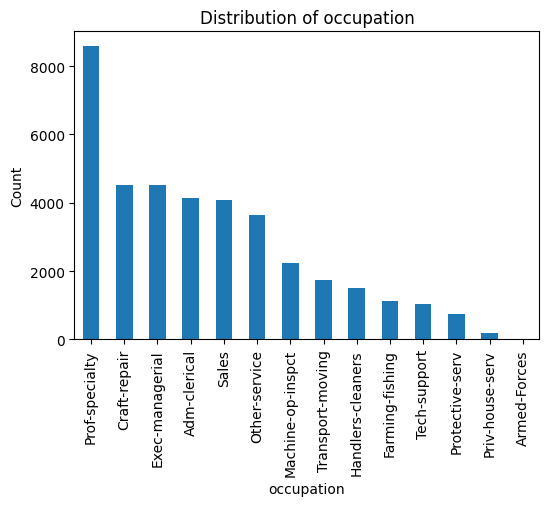

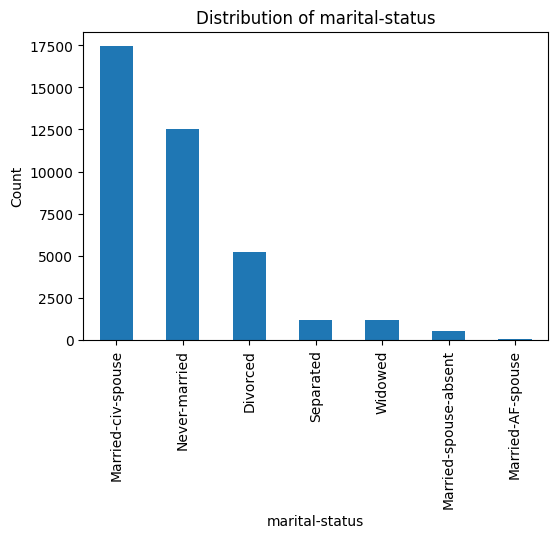

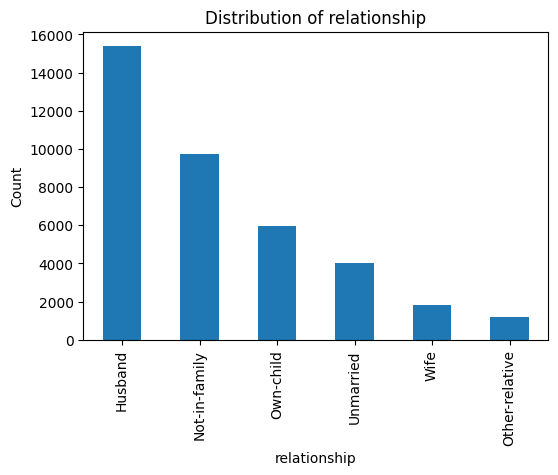

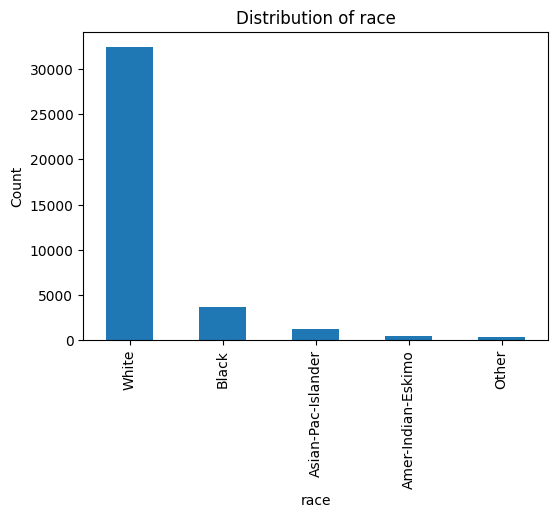

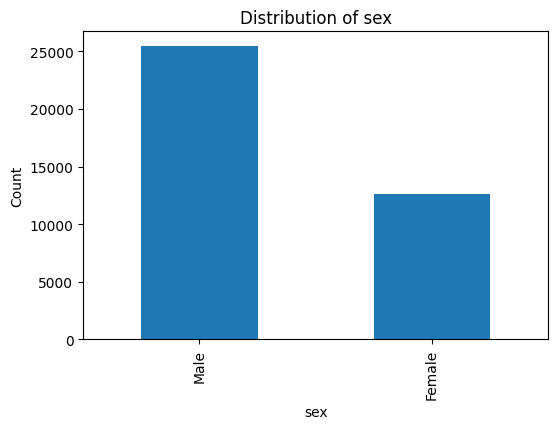

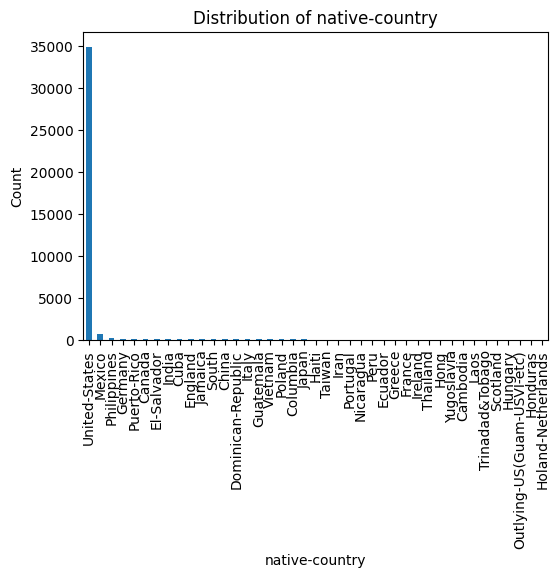

In [ ]:
#Categorical Columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    adult_data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# ***Correlation Analysis***

In [ ]:
corr_matrix = adult_data[num_cols].corr()
corr_matrix


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.077851,0.042741,NaN,NaN,0.091762
fnlwgt,-0.077851,1.000000,-0.037383,NaN,NaN,-0.019700
education-num,0.042741,-0.037383,1.000000,NaN,NaN,0.179878
capital-gain,NaN,NaN,NaN,NaN,NaN,NaN
capital-loss,NaN,NaN,NaN,NaN,NaN,NaN
hours-per-week,0.091762,-0.019700,0.179878,NaN,NaN,1.000000


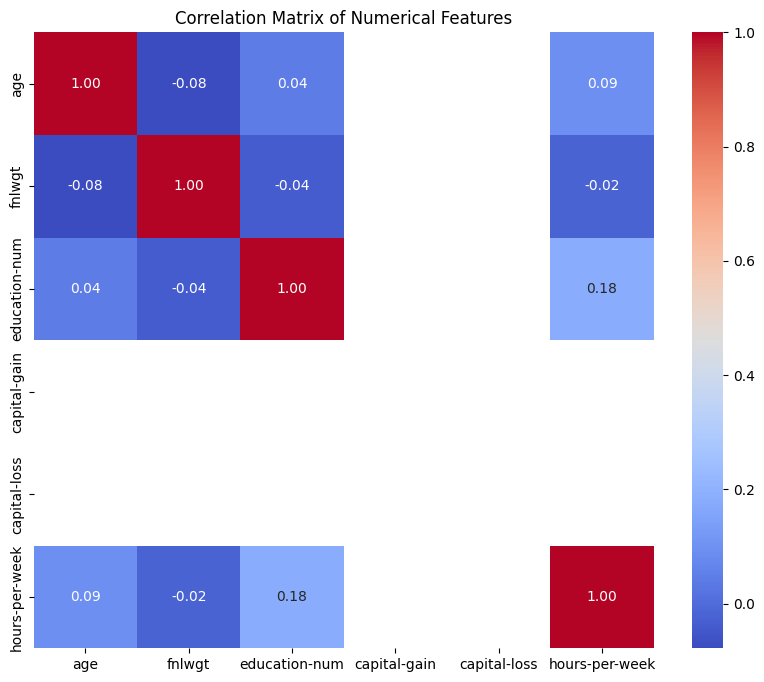

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f'
)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [ ]:
 # drop redundant and negative correlation features
adult_data = adult_data.drop(columns=['income','fnlwgt','education'])

# ***Encoding***

In [ ]:
adult_encoded = pd.get_dummies(adult_data, columns=cat_cols, drop_first=True).astype(int)

In [ ]:
adult_encoded.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,32,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
adult_encoded.dtypes.value_counts()


,count
int64,81


# ***Scaling***

In [ ]:
# scale only numerical data

scaler = StandardScaler()
adult_scaled = scaler.fit_transform(adult_encoded)
adult_scaled


array([[ 0.03962304,  1.15615366,  0.        , ...,  0.29768061,
        -0.04322524, -0.0223454 ],
       [ 0.87228949,  1.15615366,  0.        , ...,  0.29768061,
        -0.04322524, -0.0223454 ],
       [-0.03607391, -0.44001424,  0.        , ...,  0.29768061,
        -0.04322524, -0.0223454 ],
       ...,
       [-1.39861901, -0.44001424,  0.        , ...,  0.29768061,
        -0.04322524, -0.0223454 ],
       [-1.62570986, -0.44001424,  0.        , ...,  0.29768061,
        -0.04322524, -0.0223454 ],
       [-0.56595256,  1.15615366,  0.        , ...,  0.29768061,
        -0.04322524, -0.0223454 ]])

# ***PCA***

In [ ]:
pca = PCA().fit(adult_scaled)
explained_variance = pca.explained_variance_ratio_

import numpy as np
cum_var = np.cumsum(explained_variance)
print(cum_var)

[0.0406117  0.07188837 0.09856518 0.12253887 0.14424287 0.16505857
 0.18409671 0.2017021  0.21833549 0.23393502 0.24890838 0.2637557
 0.27815536 0.29233484 0.30642757 0.32029155 0.33397842 0.34756422
 0.36112195 0.37453691 0.38785087 0.40096947 0.41393624 0.42682151
 0.43967223 0.45244877 0.46518456 0.47789463 0.49059161 0.50328682
 0.51597241 0.52865687 0.54133839 0.55401865 0.56669639 0.57937236
 0.5920474  0.6047196  0.61739146 0.63006264 0.64273063 0.65539779
 0.6680645  0.68072964 0.69338865 0.70604308 0.71868038 0.73130806
 0.74393324 0.7565485  0.76914168 0.78166889 0.79418379 0.80662439
 0.81903318 0.83140879 0.84369567 0.85587765 0.86788797 0.87972098
 0.89139527 0.90284223 0.91419229 0.92519408 0.93569079 0.9458602
 0.95570052 0.96484018 0.97331617 0.98006163 0.98599342 0.99051629
 0.99456396 0.99706767 0.99851263 0.99935399 0.99983608 0.99996036
 1.         1.         1.        ]


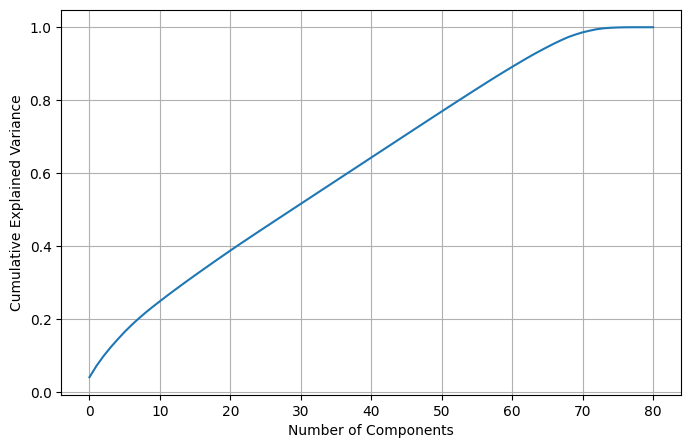

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(cum_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()

In [ ]:
pca = PCA(n_components=0.90)
adult_data_pca = pca.fit_transform(adult_scaled)

In [ ]:
adult_pca = pd.DataFrame(
    adult_data_pca,
    columns=[f'PC{i+1}' for i in range(adult_data_pca.shape[1])]
)
print(adult_pca.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.039635  1.106907 -1.834903  2.019469 -0.840772 -1.440354 -0.725708   
1  2.810838  0.078128 -0.861920  0.677692 -0.067864 -1.222895  0.029270   
2 -0.554671  0.868008  1.032104 -0.300846 -0.127756  0.021040 -1.245438   
3 -0.235767 -1.490556  0.302001 -1.691526  3.561379 -0.021008 -0.432454   
4 -0.552082 -4.277251 -0.874903 -0.755386 -0.799667  1.329889  3.842672   

        PC8       PC9      PC10  ...      PC53      PC54      PC55      PC56  \
0 -0.955687 -0.454366 -0.166833  ...  0.683347 -1.321327 -0.661172  0.797242   
1  1.467491  1.074941  0.452112  ... -0.201731  0.378952 -0.216276  0.384848   
2 -0.709192 -0.900660 -0.361205  ...  0.311941  1.092469 -0.716307  0.697101   
3 -1.036705 -0.221467  0.268165  ...  0.369223  1.185849 -0.868197  1.045575   
4 -2.019159  3.088831  0.972777  ... -1.673144  1.592593  2.722072  2.198519   

       PC57      PC58      PC59      PC60      PC61      PC62  
0 -0

In [ ]:
# Number of components chosen
print("Number of components:", pca.n_components_)

# Total variance retained
print("Total explained variance:", pca.explained_variance_ratio_.sum())


Number of components: 62
Total explained variance: 0.9028422285370145


# ***Clustering***

## ***KMeans Clustering***

In [ ]:
# KMEANS

In [ ]:
wcss = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(adult_pca)   # or X_scaled
    wcss.append(kmeans.inertia_)


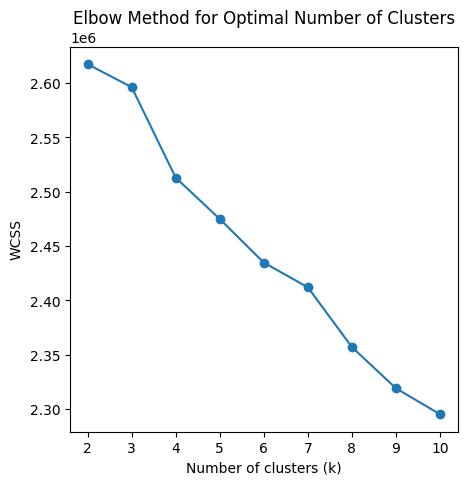

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(range(2,11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [ ]:
sil = []

for k in range(2,5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(adult_pca)
    sil_score = silhouette_score(adult_pca, labels)
    sil.append(sil_score)
    print(k, silhouette_score(adult_pca, labels))
# Find best k
best_index = sil.index(max(sil))
best_k = best_index + 2

print("Best number of clusters based on silhouette:", best_k)


2 0.08460977857021941
3 0.27111669045092607
4 0.06633535983412875
Best number of clusters based on silhouette: 3


In [ ]:
best_k = 3  # Best number of clusters based on silhouette

kmeans = KMeans(
    n_clusters=best_k,
    init='k-means++',
    max_iter=300,
    n_init=10,
    random_state=0
)

labels = kmeans.fit_predict(adult_pca)  # PCA-reduced data

# Add cluster labels to original dataset
adult_data['cluster'] = labels


In [ ]:
adult_data['cluster'].value_counts()


,count
cluster,
0,17564
1,10795
2,9712


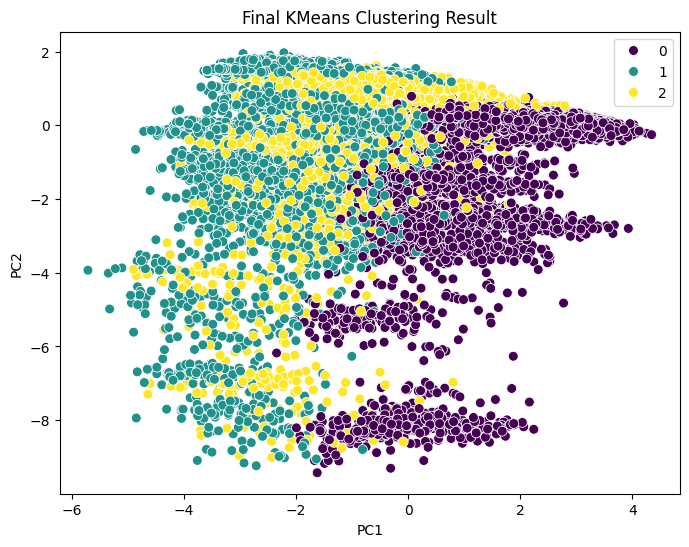

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=adult_pca.iloc[:, 0],
    y=adult_pca.iloc[:, 1],
    hue=labels,
    palette='viridis',
    s=50
)
plt.title('Final KMeans Clustering Result')
plt.show()


## ***Agglomerative Clustering***

In [ ]:
X = np.array(adult_pca)

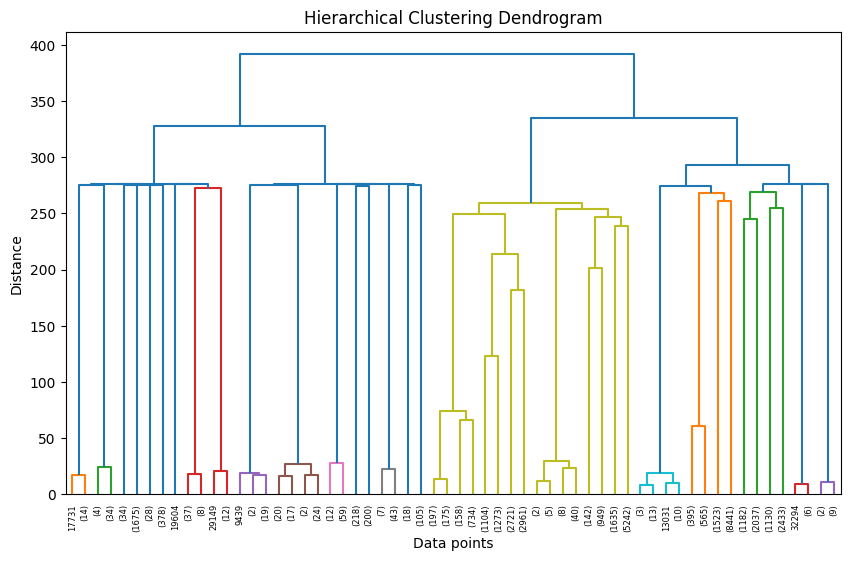

In [ ]:
# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10,6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

In [ ]:
sil_scores = {}

for k in range(2, 11):   # silhouette requires at least 2 clusters
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agg.fit_predict(X)
    sil_scores[k] = silhouette_score(X, labels)
    print(f"k = {k}, Silhouette Score = {sil_scores[k]:.4f}")


In [ ]:
best_k = 3
agg = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
labels = agg.fit_predict(adult_pca)  # or X_scaled

# Add cluster labels to dataset
data['agg_cluster'] = labels